In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer.csv to cancer (1).csv


In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

In [ ]:
# Read the data from the CSV file
df= pd.read_csv('cancer.csv')

In [ ]:
# Display the first few rows of the dataset
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Generate descriptive statistics for the dataset
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


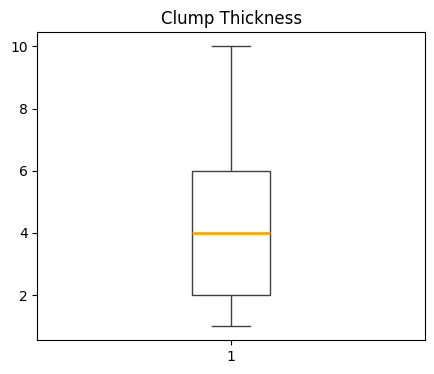

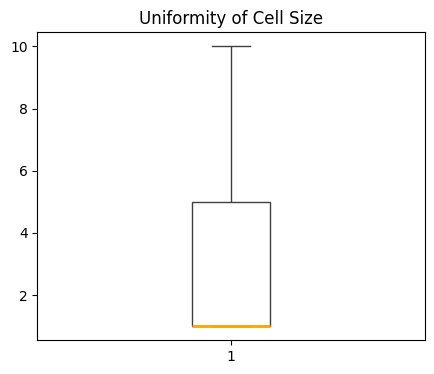

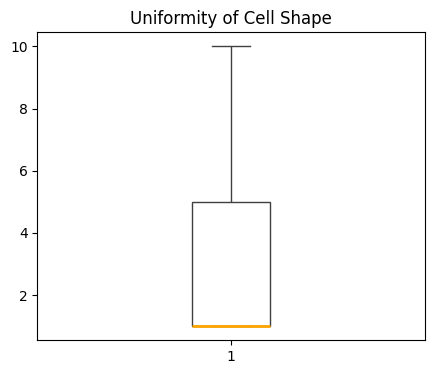

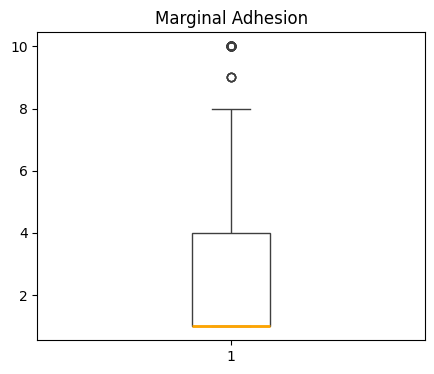

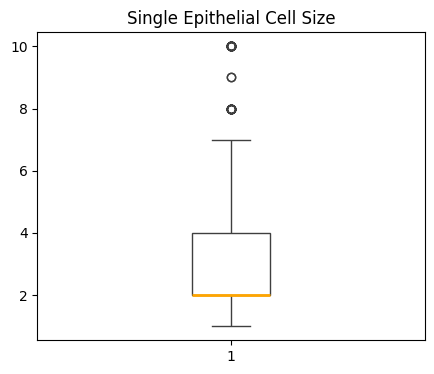

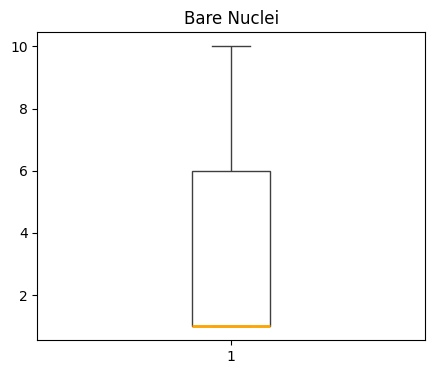

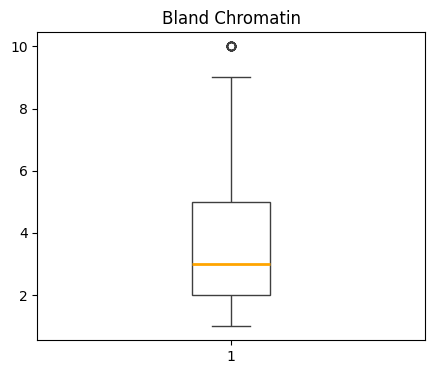

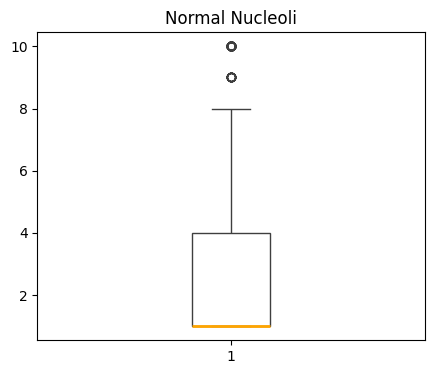

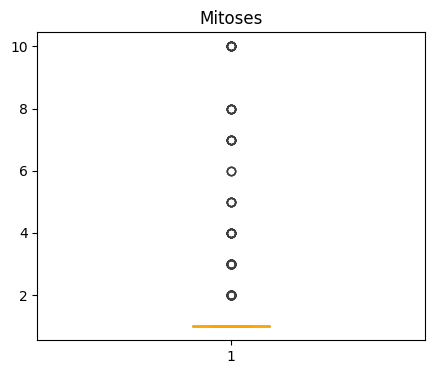

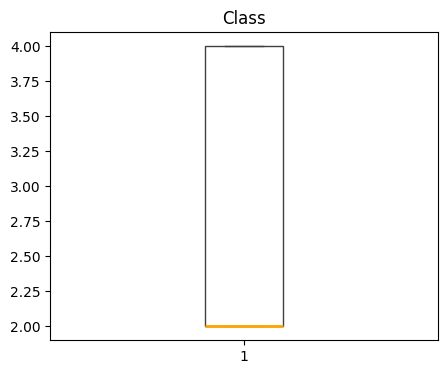

In [ ]:
# Visualize box plots for each numerical feature

for col in df.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df[col],
                width=0.2,
                boxprops=dict(facecolor='white', linewidth=1),
                medianprops=dict(color='orange', linewidth=2)
                )
    plt.title(col)
    plt.xticks([0], ['1'])
    plt.xlabel('')
    plt.ylabel('')
    plt.legend([],[], frameon=False)
    plt.show()

**Correlação** é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Varia de -1 a +1

*   +1: correlação perfeita e positiva (as duas
variáveis sobem juntas)
*   -1: correlação perfeita e negativa (uma sobe, a outra desce)
*   0: sem correlação (as variáveis não têm relação linear)

**Matriz de Correlação**

É uma tabela que mostra a correlação entre todas as variáveis numéricas de um DataFrame entre si.

---

**heatmap**

O heatmap (ou mapa de calor) é uma representação gráfica dessa matriz de correlação


---

**Quando usar a matriz de correlação e o heatmap?**

Para identificar relações entre variáveis numéricas

Para selecionar variáveis importantes para modelos de machine learning (ex: tirar colunas altamente correlacionadas entre si)

Para explorar o dataset e entender padrões de comportamento entre variáveis

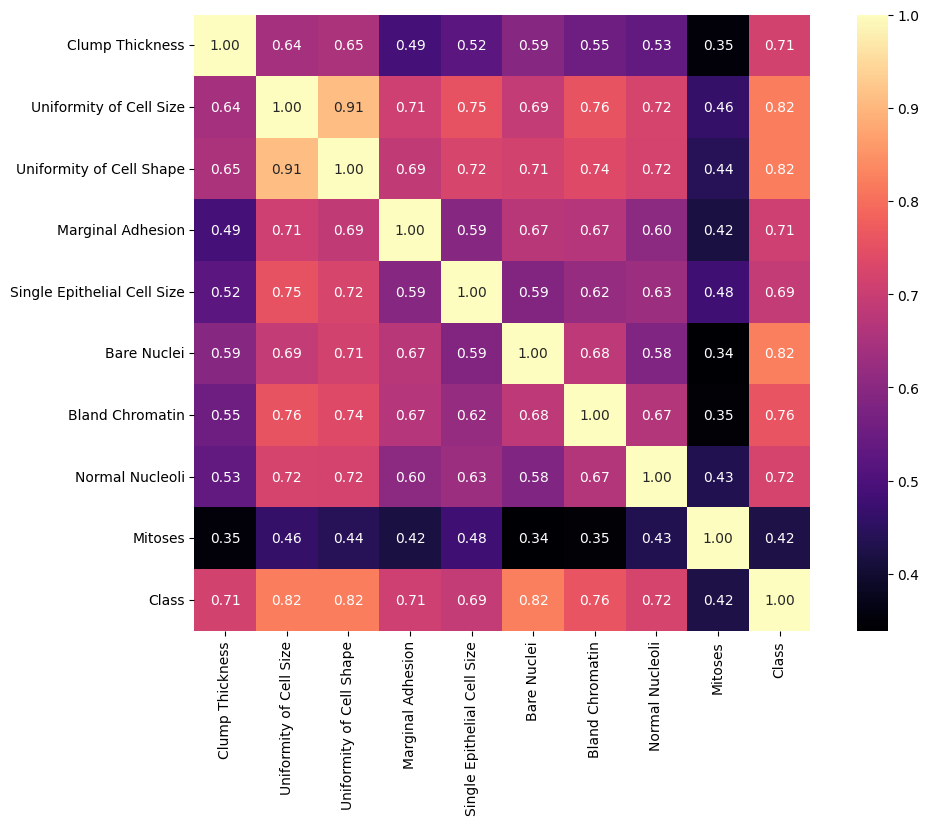

In [ ]:
# Visualize the correlation matrix using a heatmap

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='magma', square=True)

plt.show()

In [ ]:
# Separate features and target variable
# df['Class'] = df['Class'].map({2: 0, 4: 1})
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print the lengths of training and testing sets
print("Training set length:", len(X_train), "\nTesting set length:", len(X_test))
print("Training labels length:", len(y_train), "\nTesting labels length:", len(y_test))

Training set length: 478 
Testing set length: 205
Training labels length: 478 
Testing labels length: 205


**Logistic Regression básica**

A Regressão Logística é usada para classificação, (não para regressão contínua).

Versão “básica” → chamada de binomial logistic regression (ou “logística binária”).

Objetivo: prever 2 classes (ex: sim/não, spam/não spam).

Ela usa a função *sigmoide* para transformar a saída em probabilidades entre 0 e 1.

Regra de decisão: se p > 0.5, prediz classe 1; senão, classe 0.

---

**Acurácia**

É a proporção de previsões corretas sobre o total de exemplos.

Mede o percentual de acertos gerais do modelo

accuracy = numero de previsões corretas / total de previsões

(TP + TN) / Total

In [ ]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
prediction = model.predict(X_test)

# Calculate and print the accuracy score of the model
# accuracy = model.score(X_test, y_test)
accuracy = (prediction == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9560975609756097


**Matriz de Confusão?**

É uma tabela que mostra a quantidade de previsões feitas pelo modelo, separadas em categorias:

TP | FP

FN | TN

True Positive (TP) — acerto.
O modelo previu “positivo” e o valor real é “positivo”.

True Negative (TN) — acerto.
O modelo previu “negativo” e o valor real é “negativo”.

False Positive (FP) — erro tipo I (falso alarme).
O modelo previu “positivo” mas o valor real é “negativo”.

False Negative (FN) — erro tipo II (falha ao detectar).
O modelo previu “negativo” mas o valor real é “positivo”.

---

**Para que serve?**

Avaliar quantos erros o modelo cometeu em cada categoria.

Identificar o tipo de erro que é mais comum.

Calcular métricas importantes, como:
Accuracy, Precision, Recall e F1-Score

---

Ajudam a entender melhor o comportamento real do modelo.


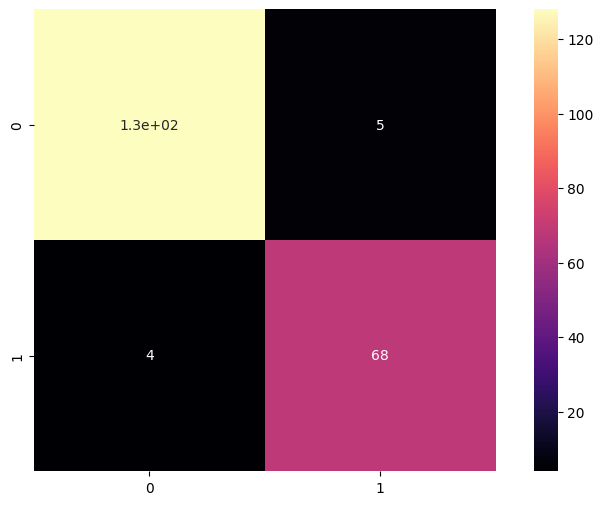

Confusion Matrix:
[[128   5]
 [  4  68]]


In [ ]:
# Import confusion_matrix from scikit-learn
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 6))

sns.heatmap(cm, annot=True, cmap='magma', square=True)
plt.show()
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

**Report**

A acurácia sozinha pode enganar, especialmente em problemas com classes desbalanceadas.

Essas métricas ajudam a entender se o modelo está previsando bem todas as classes.

O *classification report* é uma forma mais completa de entender o desempenho do seu modelo usando as informações da matriz de confusão.

---

**Metricas de classificação**

**Precision**: quantos dos positivos previstos são realmente positivos

**Recall**: quantos dos positivos reais foram corretamente previstos

**F1-score**: média harmônica entre precision e recall

**Support**: número de amostras reais para cada classe

In [ ]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate the classification report
clr = classification_report(y_test, prediction)

# Print the classification report
print("Classification Report:")
print(clr)

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       133
           4       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

